In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline


# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
pd.set_option('display.float_format', '{:.8f}'.format)
import statsmodels.api as sm

sns.set(style="ticks", color_codes=True)

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (7, 5)

import warnings
warnings.filterwarnings("ignore")

color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan"
]


In [3]:
df = pd.read_csv("BDdata1.csv",index_col='year')
print(df.shape)  # (22, 9)
df.head()

(59, 6)


,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita
year,,,,,,
1960,0.29500000,45.37900000,17.36000000,2.77156705,6.72500000,89.03524128
1961,0.29700000,45.97000000,16.92000000,2.77561443,6.76100000,97.59527391
1962,0.31700000,46.55700000,16.52000000,2.81668229,6.79400000,100.12211580
1963,0.35500000,47.12600000,16.16000000,2.90685918,6.82500000,101.90141450
1964,0.35400000,47.64900000,15.84000000,3.01212870,6.85300000,100.22111350


In [4]:
df.describe()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita
count,59.00000000,59.00000000,59.00000000,59.00000000,59.00000000,59.00000000
mean,0.22784746,58.32352542,9.92101695,2.07212043,4.70077966,409.09625103
std,0.13261323,9.14938559,4.71930434,0.66307303,1.88800190,375.46092984
min,0.05300000,45.37900000,2.67000000,1.04200113,2.03600000,89.03524128
25%,0.11050000,48.27450000,5.33000000,1.49599951,2.82900000,140.59994140
50%,0.19800000,57.57100000,10.34000000,2.13449592,4.68600000,285.82921400
75%,0.35450000,67.10850000,14.54500000,2.62540671,6.75950000,460.80128950
max,0.51300000,72.32000000,17.36000000,3.23044575,6.94700000,1698.35039400


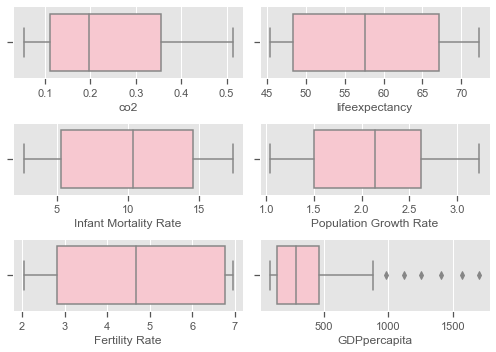

In [5]:
names = list(df.columns)
f, axes = plt.subplots(round(len(names)/2), 2)
y = 0;
for name in names:
    i, j = divmod(y, 2)
    sns.boxplot(x=df[name], color=color_list[6], ax=axes[i, j])
    y = y + 1

plt.tight_layout()

plt.show()

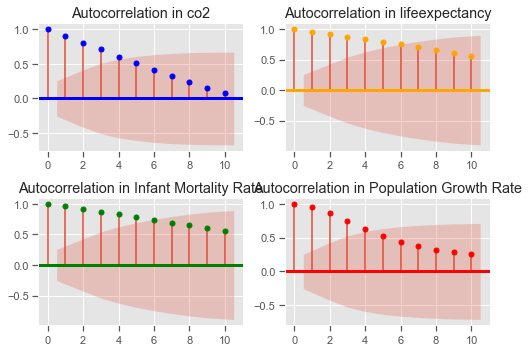

In [6]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
f, axes = plt.subplots(2, 2, squeeze=False)
y=0
for i, ax in enumerate(axes.flatten()):
    c, d = divmod(y, 2)
    data = df[df.columns[i]]
    plot_acf(data, color=color_list[i%(len(color_list))], linewidth=3, lags=10, ax=axes[c, d])
    ax.set_title('Autocorrelation in '+df.columns[i])
    y = y + 1

plt.tight_layout()
plt.show()

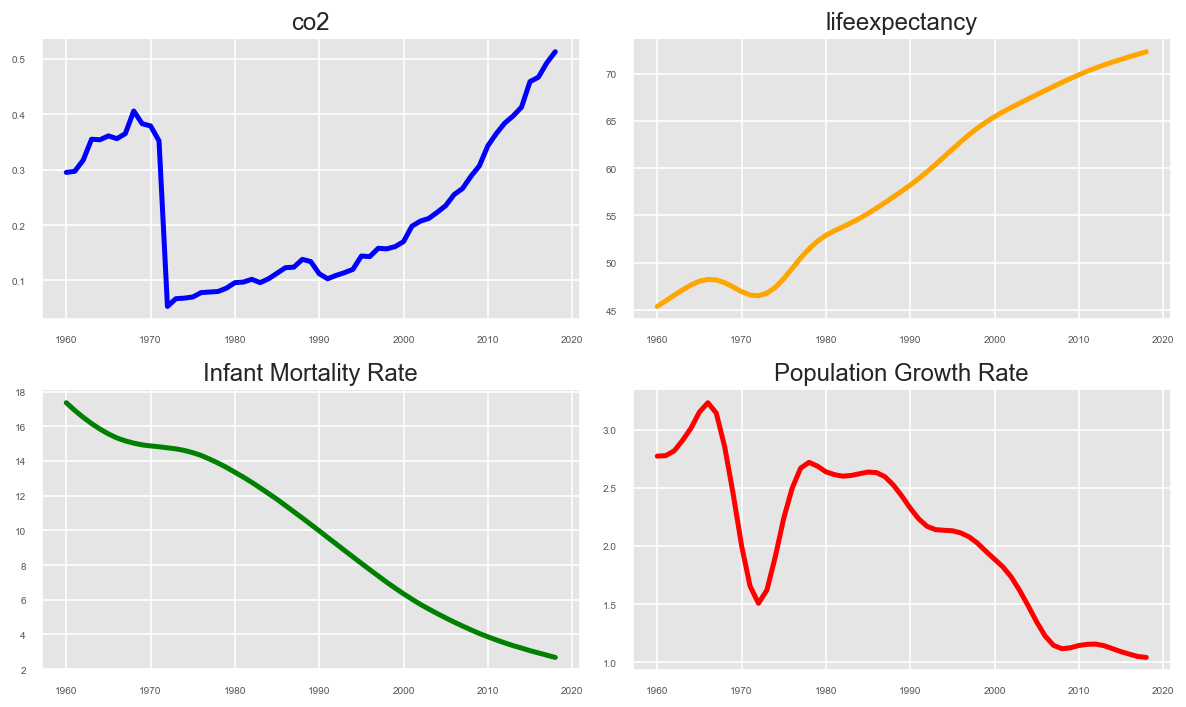

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color=color_list[i%(len(color_list))], linewidth=3)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

<Figure size 144x216 with 0 Axes>

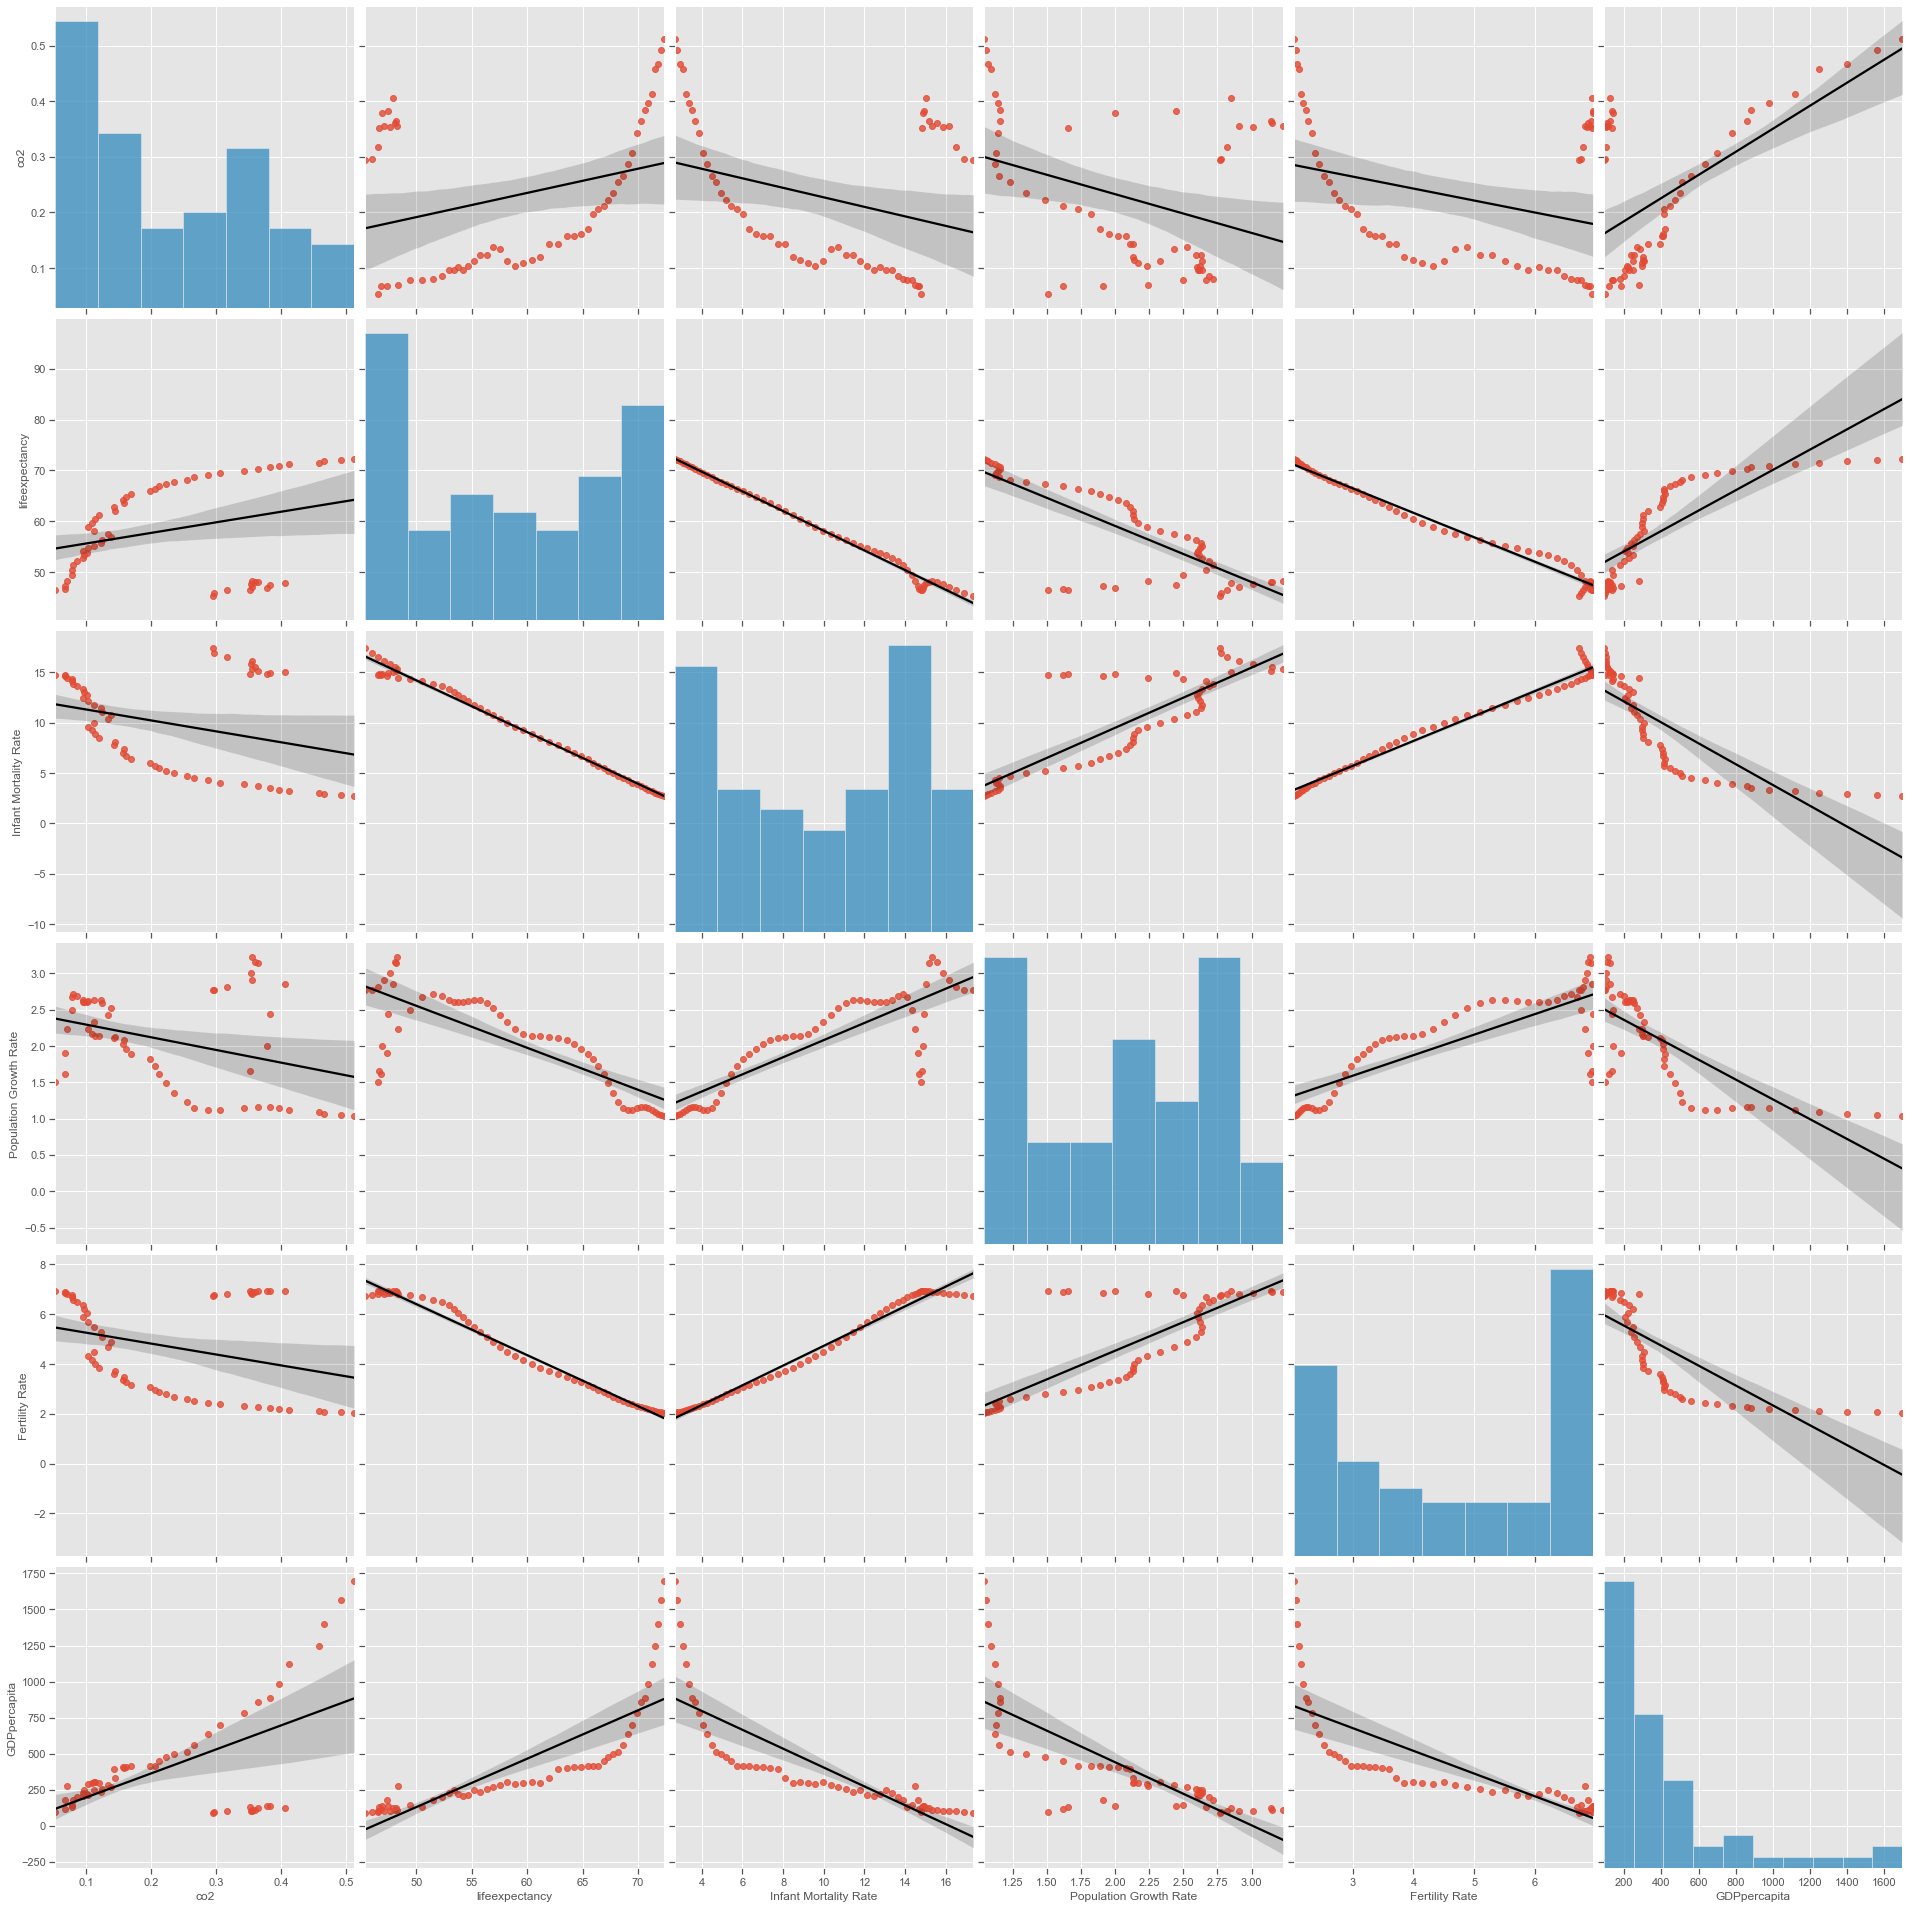

In [8]:
plt.figure(figsize=(2,3))
sns.pairplot(df, height=4.5, kind="reg", plot_kws={'line_kws':{'color':'black'}})
plt.show()

(0.0, 4.0)

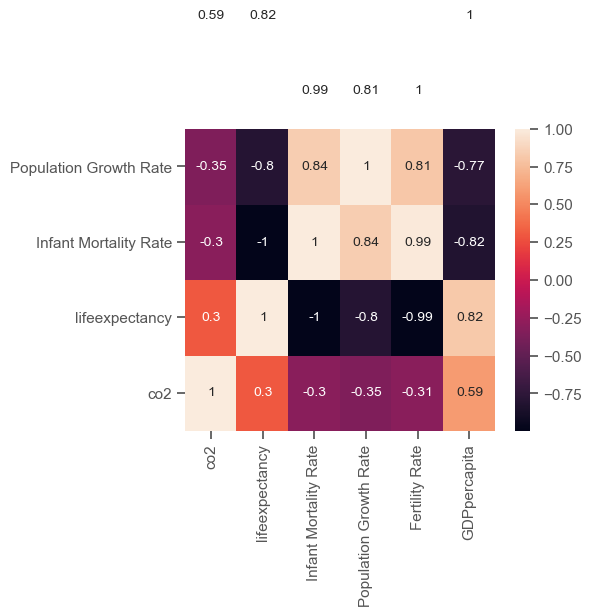

In [9]:
plt.figure(figsize=(5,4), dpi=100)
hp = sns.heatmap(df.corr(), annot=True)
hp.set_ylim(0,4)

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=6
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

,co2_x,lifeexpectancy_x,Infant Mortality Rate_x,Population Growth Rate_x,Fertility Rate_x,GDPpercapita_x
co2_y,1.00000000,0.00000000,0.00630000,0.00000000,0.00070000,0.01440000
lifeexpectancy_y,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00430000
Infant Mortality Rate_y,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00010000
Population Growth Rate_y,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000
Fertility Rate_y,0.00000000,0.00000000,0.00000000,0.00160000,1.00000000,0.00060000
GDPpercapita_y,0.00000000,0.01300000,0.00790000,0.27080000,0.00370000,1.00000000


In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
co2    ::  425.1     > 83.9383   =>   True
lifeexpectancy ::  284.53    > 60.0627   =>   True
Infant Mortality Rate ::  162.35    > 40.1749   =>   True
Population Growth Rate ::  95.91     > 24.2761   =>   True
Fertility Rate ::  44.49     > 12.3212   =>   True
GDPpercapita ::  2.05      > 4.1296    =>   False


In [13]:
nobs = 12
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (34, 4)
print(df_test.shape)  # (4, 4)

(47, 6)
(12, 6)


In [14]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [15]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "co2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.561
 No. Lags Chosen       = 0
 Critical value 1%     = -3.581
 Critical value 5%     = -2.927
 Critical value 10%    = -2.602
 => P-Value = 0.5031. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1886
 No. Lags Chosen       = 10
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.0207. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Infant Mortality Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [16]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [17]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "co2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.1718
 No. Lags Chosen       = 0
 Critical value 1%     = -3.585
 Critical value 5%     = -2.928
 Critical value 10%    = -2.602
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.871
 No. Lags Chosen       = 10
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.3458. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Infant Mortality Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit r

In [18]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [19]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "co2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.7732
 No. Lags Chosen       = 10
 Critical value 1%     = -3.639
 Critical value 5%     = -2.951
 Critical value 10%    = -2.614
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.2284
 No. Lags Chosen       = 9
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.6612. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Infant Mortality Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [20]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [21]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "co2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.124
 No. Lags Chosen       = 5
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0073
 No. Lags Chosen       = 8
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Infant Mortality Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

In [23]:
df_differenced.columns

Index(['co2', 'lifeexpectancy', 'Infant Mortality Rate',
       'Population Growth Rate', 'Fertility Rate', 'GDPpercapita'],
      dtype='object')

In [26]:
df_differenced=df_differenced.drop(['Infant Mortality Rate'],axis='columns')

In [27]:
df_differenced.columns

Index(['co2', 'lifeexpectancy', 'Population Growth Rate', 'Fertility Rate',
       'GDPpercapita'],
      dtype='object')

In [28]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "co2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.124
 No. Lags Chosen       = 5
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lifeexpectancy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.0073
 No. Lags Chosen       = 8
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Population Growth Rate" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

In [31]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -21.56520909166436
BIC :  -20.33646482490141
FPE :  4.3483868115449917e-10
HQIC:  -21.11208618071478 

Lag Order = 2
AIC :  -24.226245314067747
BIC :  -21.950725575839527
FPE :  3.2048543193353223e-11
HQIC:  -23.39217733179189 

Lag Order = 3
AIC :  -26.437965806323
BIC :  -23.094410554217035
FPE :  4.102077284035958e-12
HQIC:  -25.22042732976338 

Lag Order = 4
AIC :  -26.887556417345472
BIC :  -22.45424785029639
FPE :  3.764590625064019e-12
HQIC:  -25.28461202728848 

Lag Order = 5
AIC :  -32.23697821898535
BIC :  -26.691772731886523
FPE :  3.9738523062746537e-14
HQIC:  -30.247406208387837 

Lag Order = 6
AIC :  -37.27262801512009
BIC :  -30.593000258341412
FPE :  1.7319283149006538e-15
HQIC:  -34.89606752013745 



In [33]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 04, Aug, 2021
Time:                     03:19:58
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -30.5930
Nobs:                     38.0000    HQIC:                  -34.8961
Log likelihood:           593.582    FPE:                1.73193e-15
AIC:                     -37.2726    Det(Omega_mle):     8.77410e-17
--------------------------------------------------------------------
Results for equation co2
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                             0.007897         0.010042            0.786           0.432
L1.co2                           -1.717648         0.255204           -6.730           0.000
L1.lifeexpecta

In [34]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 1

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

6


array([[ 1.40000000e-02,  8.00000000e-03, -4.38010900e-03,
        -1.00000000e-03, -1.79720738e+01],
       [-3.80000000e-02,  2.20000000e-02, -2.24705000e-02,
         1.00000000e-03,  1.26406828e+01],
       [ 1.50000000e-02,  1.70000000e-02, -4.67681900e-03,
        -2.00000000e-03,  3.41042069e+01],
       [ 1.00000000e-02,  7.00000000e-03,  1.28788560e-02,
         3.00000000e-03, -3.94337206e+01],
       [-5.00000000e-03,  8.00000000e-03,  7.22386700e-03,
         8.88178420e-16, -5.62096200e-01],
       [ 7.00000000e-03,  1.00000000e-03,  2.42633120e-02,
         1.00000000e-03, -9.18057750e+00]])

In [36]:
df=df.drop(['Infant Mortality Rate'],axis='columns')

In [37]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,co2_2d,lifeexpectancy_2d,Population Growth Rate_2d,Fertility Rate_2d,GDPpercapita_2d
year,,,,,
2007,-0.08431256,-0.01398182,-0.00588956,0.00026184,-49.30613869
2008,0.21116463,-0.02652292,0.00497835,0.00327305,149.45023072
2009,-0.22350761,-0.03501651,-0.03781653,0.00069720,-132.61779176
2010,0.15576593,-0.03146868,-0.04544055,0.00173822,106.18296268
2011,-0.07128556,-0.02713362,-0.01688299,0.00391717,-135.84423839
2012,-0.08871951,-0.02536392,0.01516410,0.00003137,106.13822793
2013,0.18501611,0.00220707,0.01144215,0.00267474,-53.05242017
2014,-0.15177040,0.01926977,0.03502043,0.00214343,32.26752070
2015,0.06294422,0.01971526,0.02494528,0.00003286,20.77770588


In [40]:
nobs = 12
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (34, 4)
print(df_test.shape)  # (4, 4)

(47, 5)
(12, 5)


In [41]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [44]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
#df_results.loc[:, ['co2_forecast', 'lifeexpect_forecast', 'popgrowth_forecast', 'fertility_forecast','GDP_forecast']]

In [45]:
df_results.head()

,co2_2d,lifeexpectancy_2d,Population Growth Rate_2d,Fertility Rate_2d,GDPpercapita_2d,co2_1d,co2_forecast,lifeexpectancy_1d,lifeexpectancy_forecast,Population Growth Rate_1d,Population Growth Rate_forecast,Fertility Rate_1d,Fertility Rate_forecast,GDPpercapita_1d,GDPpercapita_forecast
year,,,,,,,,,,,,,,,
2007,-0.08431256,-0.01398182,-0.00588956,0.00026184,-49.30613869,-0.06431256,0.19068744,0.42601818,68.63901818,-0.12640204,1.10021574,-0.08673816,2.51726184,-39.12793599,470.51220691
2008,0.21116463,-0.02652292,0.00497835,0.00327305,149.45023072,0.14685207,0.33753951,0.39949526,69.03851344,-0.12142368,0.97879205,-0.08346510,2.43379674,110.32229473,580.83450163
2009,-0.22350761,-0.03501651,-0.03781653,0.00069720,-132.61779176,-0.07665554,0.26088397,0.36447875,69.40299219,-0.15924022,0.81955184,-0.08276790,2.35102883,-22.29549703,558.53900460
2010,0.15576593,-0.03146868,-0.04544055,0.00173822,106.18296268,0.07911039,0.33999436,0.33301007,69.73600226,-0.20468077,0.61487107,-0.08102968,2.26999915,83.88746565,642.42647025
2011,-0.07128556,-0.02713362,-0.01688299,0.00391717,-135.84423839,0.00782483,0.34781920,0.30587645,70.04187871,-0.22156376,0.39330730,-0.07711251,2.19288665,-51.95677275,590.46969750


In [49]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

print('Forecast Accuracy of: co2')
accuracy_prod = forecast_accuracy(df_results['co2_forecast'].values, df_test['co2'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: lifeexpectancy')
accuracy_prod = forecast_accuracy(df_results['lifeexpectancy_forecast'].values, df_test['lifeexpectancy'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: Population Growth Rate')
accuracy_prod = forecast_accuracy(df_results['Population Growth Rate_forecast'].values, df_test['Population Growth Rate'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: Fertility Rate')
accuracy_prod = forecast_accuracy(df_results['Fertility Rate_forecast'].values, df_test['Fertility Rate'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
print('')
print('Forecast Accuracy of: GDPpercapita')
accuracy_prod = forecast_accuracy(df_results['GDPpercapita_forecast'].values, df_test['GDPpercapita'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: co2
mape :  0.1867
me :  -0.0671
mae :  0.0754
mpe :  -0.158
rmse :  0.0882
corr :  0.6772

Forecast Accuracy of: lifeexpectancy
mape :  0.0024
me :  -0.1681
mae :  0.1681
mpe :  -0.0024
rmse :  0.2044
corr :  0.9952

Forecast Accuracy of: Population Growth Rate
mape :  0.8762
me :  -0.9594
mae :  0.9594
mpe :  -0.8762
rmse :  1.1175
corr :  0.7406

Forecast Accuracy of: Fertility Rate
mape :  0.0694
me :  -0.1474
mae :  0.1474
mpe :  -0.0694
rmse :  0.1853
corr :  0.9905

Forecast Accuracy of: GDPpercapita
mape :  0.325
me :  -385.8794
mae :  385.8794
mpe :  -0.325
rmse :  475.0174
corr :  0.9301


In [50]:
df_results

,co2_2d,lifeexpectancy_2d,Population Growth Rate_2d,Fertility Rate_2d,GDPpercapita_2d,co2_1d,co2_forecast,lifeexpectancy_1d,lifeexpectancy_forecast,Population Growth Rate_1d,Population Growth Rate_forecast,Fertility Rate_1d,Fertility Rate_forecast,GDPpercapita_1d,GDPpercapita_forecast
year,,,,,,,,,,,,,,,
2007,-0.08431256,-0.01398182,-0.00588956,0.00026184,-49.30613869,-0.06431256,0.19068744,0.42601818,68.63901818,-0.12640204,1.10021574,-0.08673816,2.51726184,-39.12793599,470.51220691
2008,0.21116463,-0.02652292,0.00497835,0.00327305,149.45023072,0.14685207,0.33753951,0.39949526,69.03851344,-0.12142368,0.97879205,-0.08346510,2.43379674,110.32229473,580.83450163
2009,-0.22350761,-0.03501651,-0.03781653,0.00069720,-132.61779176,-0.07665554,0.26088397,0.36447875,69.40299219,-0.15924022,0.81955184,-0.08276790,2.35102883,-22.29549703,558.53900460
2010,0.15576593,-0.03146868,-0.04544055,0.00173822,106.18296268,0.07911039,0.33999436,0.33301007,69.73600226,-0.20468077,0.61487107,-0.08102968,2.26999915,83.88746565,642.42647025
2011,-0.07128556,-0.02713362,-0.01688299,0.00391717,-135.84423839,0.00782483,0.34781920,0.30587645,70.04187871,-0.22156376,0.39330730,-0.07711251,2.19288665,-51.95677275,590.46969750
2012,-0.08871951,-0.02536392,0.01516410,0.00003137,106.13822793,-0.08089468,0.26692452,0.28051252,70.32239123,-0.20639967,0.18690764,-0.07708113,2.11580552,54.18145518,644.65115269
2013,0.18501611,0.00220707,0.01144215,0.00267474,-53.05242017,0.10412143,0.37104595,0.28271959,70.60511082,-0.19495751,-0.00804987,-0.07440639,2.04139912,1.12903502,645.78018770
2014,-0.15177040,0.01926977,0.03502043,0.00214343,32.26752070,-0.04764896,0.32339699,0.30198937,70.90710019,-0.15993708,-0.16798696,-0.07226296,1.96913616,33.39655572,679.17674342
2015,0.06294422,0.01971526,0.02494528,0.00003286,20.77770588,0.01529526,0.33869225,0.32170462,71.22880481,-0.13499180,-0.30297876,-0.07223010,1.89690606,54.17426160,733.35100502


In [51]:
df_results.to_excel('saved_file.xlsx')